In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import seaborn as sns
import cv2 as cv

%matplotlib inline

from PIL import Image

In [160]:
input_path = "./datasets/SomiteTraceLibrary/input/frames_orig/"
im = imread(input_path + "2020_02_15_R3_mem-054.tif")
im.flatten()

array([22, 23, 25, ..., 16, 37, 39], dtype=uint8)

In [166]:
from glob import iglob
membranes = pd.DataFrame([])
lens = []
for path in iglob('./datasets/SomiteTraceLibrary/input/frames/*'):
    img = imread(path)[0:128, 0:128]
    flat = pd.Series(scale(img.flatten()), name=path)
    membranes = membranes.append(flat)

In [167]:
membranes

0         1      \
./datasets/SomiteTraceLibrary/input/frames/fram... -1.351175 -1.060718   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.098538 -0.697143   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.562154 -0.943789   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.129030  1.330690   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.027780 -0.522043   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.484469 -1.190904   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.200813 -1.295723   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.520667 -0.220322   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.046483 -1.113147   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.941063  0.265456   

                                                       2         3      \
./datasets/SomiteTraceLibrary/input/frames/fram... -1.254356 -1.157537   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.897841 -0.596795   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.901385 -0.222923   
./datasets/SomiteTraceLibrary/input/frames/fram...  2.682559  0.729860   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.082185  0.247709   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.337686  0.276919   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.295723 -1.485544   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.165835 -0.649386   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.046483 -1.113147   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.603259  0.772161   

                                                       4         5      \
./datasets/SomiteTraceLibrary/input/frames/fram... -0.576624 -0.770261   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.998190 -0.396097   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.392539 -0.901385   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.471801  0.129030   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.357674 -0.741972   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.631251 -0.310210   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.295723 -1.390634   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.649386 -0.735199   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.179811 -1.179811   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.410152  0.265456   

                                                       6         7      \
./datasets/SomiteTraceLibrary/input/frames/fram... -0.673442 -1.254356   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.496446 -0.697143   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.604558 -0.986193   
./datasets/SomiteTraceLibrary/input/frames/fram...  1.180483  0.129030   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.632008 -0.082185   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.163428 -0.603775   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.105902 -1.010991   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.477760 -0.821011   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.113147 -0.913156   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.096554 -0.072348   

                                                       8         9      ...  \
./datasets/SomiteTraceLibrary/input/frames/fram... -0.963899 -0.576624  ...   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.607391  0.306344  ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.646962 -1.028597  ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.021178  0.279237  ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.082185 -0.632008  ...   
...                      

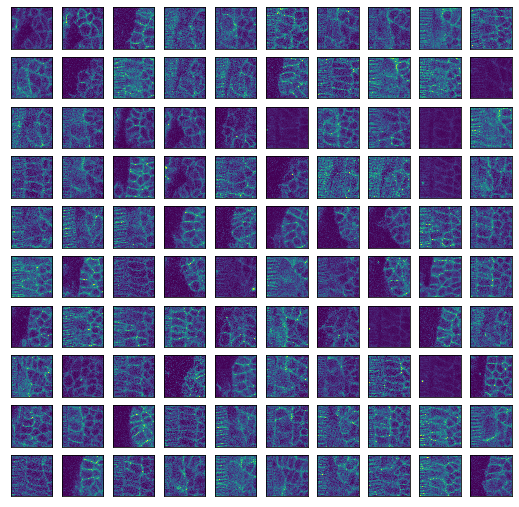

In [168]:
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(membranes.iloc[i].values.reshape(128,128))

First 20 components/"Eigenvectors"

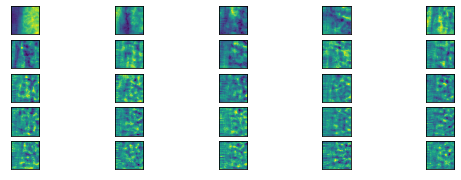

In [169]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the original dataset
pca = PCA(n_components=25)
pca.fit(membranes)

fig, axes = plt.subplots(5,5,figsize=(9,3))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(128,128))

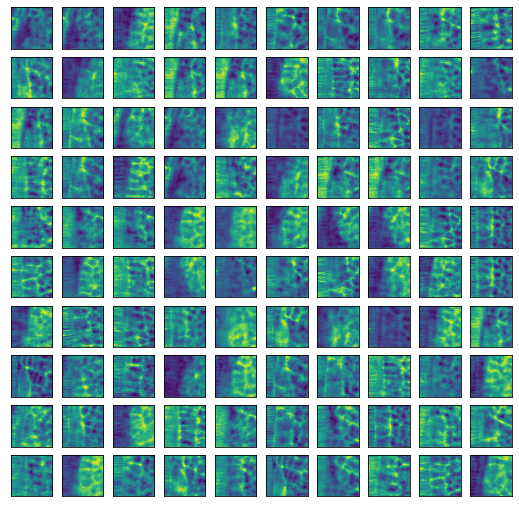

In [170]:
components = pca.transform(membranes)
projected = pca.inverse_transform(components)
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(128,128))

## Center Crop

In [183]:
membranes_centercrop = pd.DataFrame([])
for path in iglob('./datasets/SomiteTraceLibrary/input/frames/*'):
    img = imread(path)
    img_c = img[(img.shape[0]//2 - 64):(img.shape[0]//2 + 64),(img.shape[1]//2 - 64):(img.shape[1]//2 + 64)]
    flat = pd.Series(scale(img_c.flatten()), name=path)
    membranes_centercrop = membranes_centercrop.append(flat)

In [184]:
membranes_centercrop

0         1      \
./datasets/SomiteTraceLibrary/input/frames/fram... -1.229927 -0.479348   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.995719 -1.221343   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.992267 -0.256981   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.538982 -0.403795   
./datasets/SomiteTraceLibrary/input/frames/fram...  1.035594  1.889562   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.763359 -1.162208   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.195721  0.078212   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.056645  0.390605   
./datasets/SomiteTraceLibrary/input/frames/fram...  1.464598  1.538723   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.415686  1.802459   

                                                       2         3      \
./datasets/SomiteTraceLibrary/input/frames/fram... -0.801025 -1.337153   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.544471 -0.995719   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.578669  0.432349   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.001766 -0.944542   
./datasets/SomiteTraceLibrary/input/frames/fram...  1.249086  1.676070   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.295158 -0.896309   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.039296  0.195721   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.247479 -0.611274   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.056218 -0.092032   
./datasets/SomiteTraceLibrary/input/frames/fram...  3.343319  1.186116   

                                                       4         5      \
./datasets/SomiteTraceLibrary/input/frames/fram... -1.229927  0.056780   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.882907 -0.544471   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.340438  2.040786   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.133421  0.001766   
./datasets/SomiteTraceLibrary/input/frames/fram...  2.209799  1.569324   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -1.029259 -0.896309   
./datasets/SomiteTraceLibrary/input/frames/fram...  1.135791  0.313230   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.325023 -0.086480   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.166157 -0.166157   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.415686  0.107514   

                                                       6         7      \
./datasets/SomiteTraceLibrary/input/frames/fram... -0.157671 -0.801025   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.770095 -0.882907   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.799991  0.616170   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.809356  0.136953   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.608610  0.501864   
...                                                      ...       ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.098609 -1.428108   
./datasets/SomiteTraceLibrary/input/frames/fram...  1.723335  0.900773   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.104354  1.678734   
./datasets/SomiteTraceLibrary/input/frames/fram...  0.871596 -0.462658   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.354744 -0.508830   

                                                       8         9      ...  \
./datasets/SomiteTraceLibrary/input/frames/fram...  0.271232  0.485683  ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.657283 -1.559779  ...   
./datasets/SomiteTraceLibrary/input/frames/fram...  1.489322  0.018751  ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.538982 -0.133421  ...   
./datasets/SomiteTraceLibrary/input/frames/fram... -0.992580 -0.565596  ...   
...                      

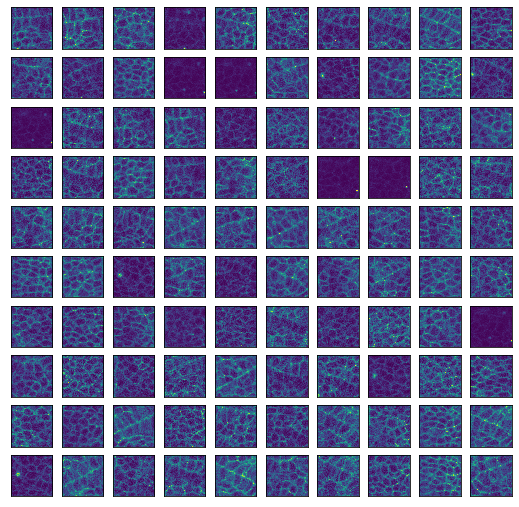

In [185]:
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(membranes_centercrop.iloc[i].values.reshape(128,128))

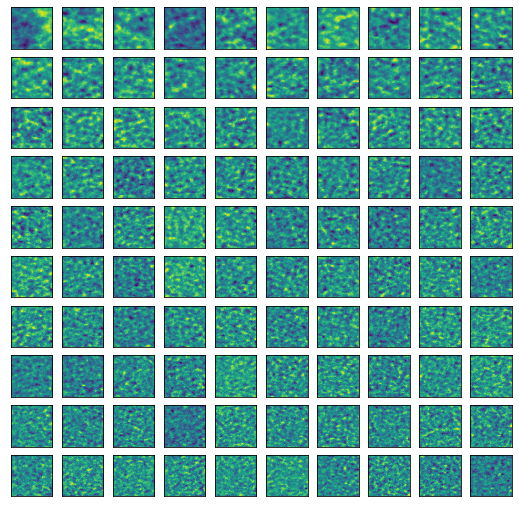

In [186]:
pca_c = PCA(n_components=100)
pca_c.fit(membranes_centercrop)

fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_c.components_[i].reshape(128,128))

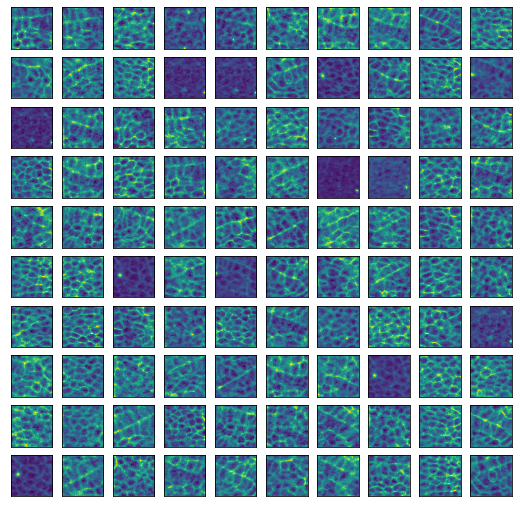

In [187]:
components_c = pca_c.transform(membranes_centercrop)
projected_c = pca_c.inverse_transform(components_c)
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_c[i].reshape(128,128))

In [195]:
print("Percent of variance explained:", sum(pca_c.explained_variance_ratio_))

Percent of variance explained: 0.48445006160897996


## PCA on boundaries

In [196]:
input_path = "./datasets/SomiteTraceLibrary/input/masks_orig/"
im = imread(input_path + "2020_02_05_L3_btr-001.tif")
im.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [197]:
bound_centercrop = pd.DataFrame([])
for path in iglob('./datasets/SomiteTraceLibrary/input/masks/*'):
    img = imread(path)
    img_c = img[(img.shape[0]//2 - 64):(img.shape[0]//2 + 64),(img.shape[1]//2 - 64):(img.shape[1]//2 + 64)]
    flat = pd.Series(img_c.flatten(), name=path)
    bound_centercrop = bound_centercrop.append(flat)

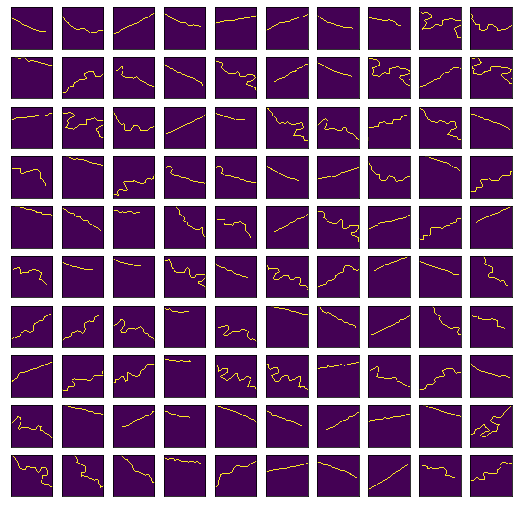

In [198]:
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(bound_centercrop.iloc[i].values.reshape(128,128))

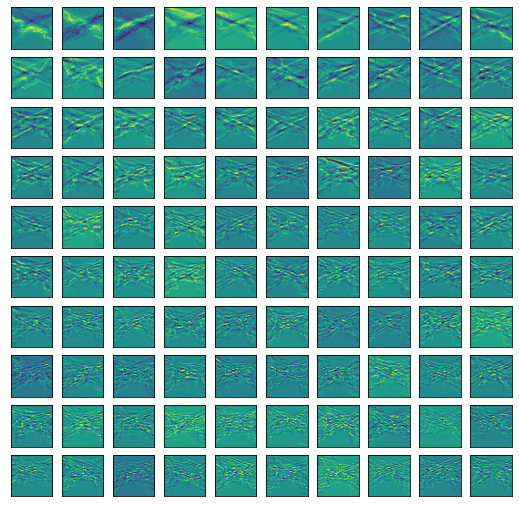

In [199]:
pca_b = PCA(n_components=100)
pca_b.fit(bound_centercrop)

fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_b.components_[i].reshape(128,128))

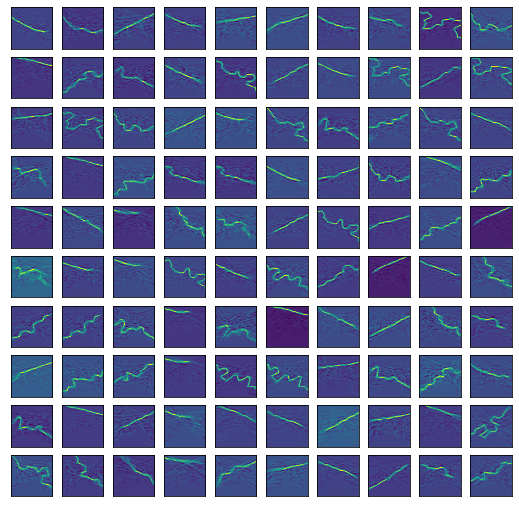

In [200]:
components_b = pca_b.transform(bound_centercrop)
projected_b = pca_b.inverse_transform(components_b)
fig, axes = plt.subplots(10,10,figsize=(9,9))
plt.setp(axes, xticks=[], yticks=[])
for i, ax in enumerate(axes.flat):
    ax.imshow(projected_b[i].reshape(128,128))

In [201]:
sum(pca_b.explained_variance_ratio_)

0.5138032632867083

In [5]:
input_path = "./datasets/SomiteTraceLibrary/input/masks/"
output_path = "./datasets/SomiteTraceLibrary/input/masks_bmp/"
masks = os.listdir("./datasets/SomiteTraceLibrary/input/masks/")
for mask in masks:
    img = Image.open(input_path + mask).convert('1')
    img.save(output_path + mask[:-4] + ".bmp")
    